In [1]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [2]:
#import data
#2019_20
PL19_20_fixtures = pd.read_csv('Data/2019-20/Fixtures/PL19_20_features.csv')
PL19_20_fixtures.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_lineups = pd.read_csv('Data/2019-20/Players/PL2019_lineups.csv')
PL19_20_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_player_stats = pd.read_csv('Data/2019-20/Players/PL2019_total.csv')
PL19_20_player_stats['player'] = PL19_20_player_stats['player'].fillna(0)
PL19_20_player_stats['team_rating'] = PL19_20_player_stats['team_rating'].fillna(0)
PL19_20_player_stats['category'] = PL19_20_player_stats['category'].fillna(0)
PL19_20_player_stats.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_player_stats['player_id'] = PL19_20_player_stats['player'].astype(str) + PL19_20_player_stats['team_rating'].astype(str) + PL19_20_player_stats['date'].astype(str)
PL19_20_player_stats['game_id'] = PL19_20_player_stats['team_rating'].astype(str) + PL19_20_player_stats['date'].astype(str)
PL19_20_lineups['player_id'] = PL19_20_lineups['player'] + PL19_20_lineups['team'] + PL19_20_lineups['date'].astype(str)
PL19_20_lineups['game_id'] = PL19_20_lineups['team'] + PL19_20_lineups['date'].astype(str)
#2020_21
PL20_21_fixtures = pd.read_csv('Data/2020-21/Fixtures/PL20_21_features.csv')
PL20_21_lineups = pd.read_csv('Data/2020-21/Players/PL2020_lineups.csv')
PL20_21_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL20_21_player_stats = pd.read_csv('Data/2020-21/Players/PL2020_total.csv')
PL20_21_lineups['player_id'] = PL20_21_lineups['player'] + PL20_21_lineups['team'] + PL20_21_lineups['date'].astype(str)
PL20_21_lineups['game_id'] = PL20_21_lineups['team'] + PL20_21_lineups['date'].astype(str)
PL20_21_lineups
PL20_21_player_stats = PL20_21_player_stats.rename(columns={'player_ID':'player_id','game_ID':'game_id'})
#2021_22
PL21_22_fixtures = pd.read_csv('Data/2021-22/Fixtures/PL21_22_features.csv')
PL21_22_lineups = pd.read_csv('Data/2021-22/Players/PL2021_lineups.csv')
PL21_22_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL21_22_player_stats = pd.read_csv('Data/2021-22/Players/PL2021_total.csv')
PL21_22_player_stats['player'] = PL21_22_player_stats['player'].fillna(0)
PL21_22_player_stats['category'] = PL21_22_player_stats['category'].fillna(0)
PL21_22_lineups['player_id'] = PL21_22_lineups['player'] + PL21_22_lineups['team'] + PL21_22_lineups['date'].astype(str)
PL21_22_lineups['game_id'] = PL21_22_lineups['team'] + PL21_22_lineups['date'].astype(str)
PL21_22_lineups
PL21_22_player_stats['player_id'] = PL21_22_player_stats['player'].astype(str) + PL21_22_player_stats['team'] + PL21_22_player_stats['date'].astype(str)
PL21_22_player_stats['game_id'] = PL21_22_player_stats['team'] + PL21_22_player_stats['date'].astype(str)

PL19_20_player_stats


,Unnamed: 0,player_fl,player,date,team_rating,category,minutes_fl,minutes_rating,rating,bonus,...,transfers_in,transfers_out,value,was_home,opponent_team,selected,player_ID,game_ID,player_id,game_id
0,0,Aaron Cresswell,Aaron Cresswell,2019-08-10,West Ham,Defender,90,90.0,16.471345,0,...,0,0,50,True,11,23399,Aaron CresswellWest Ham United2019-08-10,West Ham United2019-08-10,Aaron CresswellWest Ham2019-08-10,West Ham2019-08-10
1,1,Aaron Lennon,Aaron Lennon,2019-08-10,Burnley,Midfield,6,7.0,2.007932,0,...,0,0,50,True,16,8105,Aaron LennonBurnley2019-08-10,Burnley2019-08-10,Aaron LennonBurnley2019-08-10,Burnley2019-08-10
2,2,Aaron Mooy,Aaron Mooy,2019-08-10,0,0,0,NaN,0.000000,0,...,0,0,50,False,18,16261,NaN,NaN,Aaron Mooy02019-08-10,02019-08-10
3,3,Aaron Ramsdale,Aaron Ramsdale,2019-08-10,Bournemouth,Goalkeeper,90,90.0,37.868320,0,...,0,0,45,True,15,3091,Aaron RamsdaleBournemouth2019-08-10,Bournemouth2019-08-10,Aaron RamsdaleBournemouth2019-08-10,Bournemouth2019-08-10
4,4,Aaron Wan-Bissaka,Aaron Wan-Bissaka,2019-08-11,Manchester Utd,Defender,90,90.0,34.567219,2,...,0,0,55,True,6,1879259,Aaron Wan-BissakaManchester United2019-08-11,Manchester United2019-08-11,Aaron Wan-BissakaManchester Utd2019-08-11,Manchester Utd2019-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22556,22556,Youri Tielemans,Youri Tielemans,2020-07-26,Leicester City,Midfield,72,72.0,23.693602,0,...,1905,5008,61,True,12,283764,Youri TielemansLeicester City2020-07-26,Leicester City2020-07-26,Youri TielemansLeicester City2020-07-26,Leicester City2020-07-26
22557,22557,Yves Bissouma,Yves Bissouma,2020-07-26,Brighton,Midfield,72,72.0,10.941405,0,...,147,70,50,False,5,2136,Yves BissoumaBrighton & Hove Albion2020-07-26,Brighton & Hove Albion2020-07-26,Yves BissoumaBrighton2020-07-26,Brighton2020-07-26
22558,22558,Zech Medley,Zech Medley,2020-07-26,0,0,0,NaN,0.000000,0,...,325,172,40,True,18,2496,NaN,NaN,Zech Medley02020-07-26,02020-07-26
22559,22559,Çaglar Söyüncü,Çağlar Söyüncü,2020-07-26,0,0,0,NaN,0.000000,0,...,165,95680,49,True,12,688011,NaN,NaN,Çağlar Söyüncü02020-07-26,02020-07-26


In [3]:
#get gameweeks
def get_wk(fixtures):
    home = fixtures[['HomeTeam', 'Wk_h', 'game_home_ID']]
    away = fixtures[['AwayTeam', 'Wk_a', 'game_away_ID']]
    home = home.rename(columns={'HomeTeam':'Team','Wk_h':'wk', 'game_home_ID': 'game_id'})
    away = away.rename(columns={'AwayTeam':'Team','Wk_a':'wk', 'game_away_ID': 'game_id'})
    return home.append(away)
game_weeks_19 = get_wk(PL19_20_fixtures)
game_weeks_20 = get_wk(PL20_21_fixtures)
game_weeks_21 = get_wk(PL21_22_fixtures)
game_weeks_19


C:\Users\giuli\AppData\Local\Temp\ipykernel_110744\280487194.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)
C:\Users\giuli\AppData\Local\Temp\ipykernel_110744\280487194.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)
C:\Users\giuli\AppData\Local\Temp\ipykernel_110744\280487194.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)


,Team,wk,game_id
0,Liverpool,1,Liverpool2019-08-09
1,West Ham,1,West Ham2019-08-10
2,Bournemouth,1,Bournemouth2019-08-10
3,Burnley,1,Burnley2019-08-10
4,Crystal Palace,1,Crystal Palace2019-08-10
...,...,...,...
375,Manchester Utd,38,Manchester Utd2020-07-26
376,Norwich City,38,Norwich City2020-07-26
377,Liverpool,38,Liverpool2020-07-26
378,Sheffield Utd,38,Sheffield Utd2020-07-26


In [4]:
#merge data
#2019-20
PL19_20_lineups_tmp =  pd.merge(PL19_20_lineups, game_weeks_19[['game_id', 'wk']], on= 'game_id', how='right')
PL19_20_player_stats_tmp =  pd.merge(PL19_20_player_stats, game_weeks_19[['game_id', 'wk']], on= 'game_id', how='left')
PL19_20_lineups_tmp = pd.merge(PL19_20_lineups_tmp, PL19_20_player_stats_tmp[['player_id', 'category']], on= 'player_id')
#2020-21
PL20_21_lineups_tmp =  pd.merge(PL20_21_lineups, game_weeks_20[['game_id', 'wk']], on= 'game_id', how='left')
PL20_21_player_stats_tmp =  pd.merge(PL20_21_player_stats, game_weeks_20[['game_id', 'wk']], on= 'game_id', how='left')
PL20_21_lineups_tmp = pd.merge(PL20_21_lineups_tmp, PL20_21_player_stats_tmp[['player_id', 'category']], on= 'player_id')
#2021-22
PL21_22_lineups_tmp =  pd.merge(PL21_22_lineups, game_weeks_21[['game_id', 'wk']], on= 'game_id', how='left')
PL21_22_player_stats_tmp =  pd.merge(PL21_22_player_stats, game_weeks_21[['game_id', 'wk']], on= 'game_id', how='left')
PL21_22_lineups_tmp = pd.merge(PL21_22_lineups_tmp, PL21_22_player_stats_tmp[['player_id', 'category']], on= 'player_id')

In [5]:
#get necessary columns
PL19_20_fixtures_tmp = PL19_20_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]
PL20_21_fixtures_tmp = PL20_21_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]
PL21_22_fixtures_tmp = PL21_22_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]

In [6]:
#assign rating to each player from starting lineup or bench with ewm

#get lineup for considered match
def get_lineup(lineups_df, game_id):
    rslt_df = lineups_df[lineups_df['game_id'] == game_id]
    return rslt_df

#get player statistics for lineup
def get_player_stats(player_stats, lineup, wk):
    tmp = pd.merge(player_stats, lineup[['player', 'start11']], on= 'player')
    df = tmp.drop(tmp[tmp.wk > wk].index)
    return df

#get points for a certain gameweek for a certain statistic of one player
def get_player_points(player_df, player, wk, stat):
    rslt_df = player_df[player_df['player'] ==player]
    rslt_df2 = rslt_df[rslt_df['wk'] ==wk]
    if rslt_df2.empty == True:
        return 0
    out = rslt_df2[stat]
    out = out.values[0]
    return out

#get points for a certain time period; alpha specifies smoothing factor
def get_stats_season(player_df, player, fr, to, stat):
    test = []
    out = 0
    df2 = 0
    if fr == to: return 0
    for i in range(int(fr), int (to)):
        out =  get_player_points(player_df ,player, i, stat)
        test.append(out)
        df = pd.Series(test)
        df2 = df.ewm(alpha=0.9).mean()[len(df) - 1]
    return df2

#append statistic value to the df
def append_stats(features ,player_df,lineup_df ,stat):
    index = 0
    features_dict = features.to_dict('records')
    #for index, row in features.iterrows():
    start = time.process_time()
    for row in features_dict:
        lineup_h = get_lineup(lineup_df, row['game_home_ID'])
        lineup_a = get_lineup(lineup_df, row['game_away_ID'])
        lineup_h = lineup_h.to_dict('records')
        lineup_a = lineup_a.to_dict('records')
        rating_h_bench = 0
        rating_h_gk = 0
        rating_h_df = 0
        rating_h_mf = 0
        rating_h_att = 0
        rating_a_bench = 0
        rating_a_gk = 0
        rating_a_df = 0
        rating_a_mf = 0
        rating_a_att = 0
        influence_h = 0
        influence_a = 0
        creativity_h = 0
        creativity_a = 0
        threat_h = 0
        threat_a = 0
        selected_h = 0
        selected_a = 0
        bps_h = 0
        bps_a = 0
        #print(index)
        for row_l in lineup_h:
            if row_l['start11'] == False:
                rating_h_bench = rating_h_bench + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
            if row_l['category'] == 'Goalkeeper' and row_l['start11'] == True:
                rating_h_gk = rating_h_gk + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Defender'and row_l['start11'] == True:
                rating_h_df = rating_h_df + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Midfield'and row_l['start11'] == True:
                rating_h_mf = rating_h_mf + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Forward'and row_l['start11'] == True:
                rating_h_att = rating_h_att + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')

        for row_l in lineup_a:
            if row_l['start11'] == False:
                rating_a_bench = rating_a_bench + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
            if row_l['category'] == 'Goalkeeper' and row_l['start11'] == True:
                rating_a_gk = rating_a_gk + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Defender'and row_l['start11'] == True:
                rating_a_df = rating_a_df + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Midfield'and row_l['start11'] == True:
                rating_a_mf = rating_a_mf + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Forward'and row_l['start11'] == True:
                rating_a_att = rating_a_att + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
        features.loc[index, 'rating_h_gk'] = rating_h_gk
        features.loc[index, 'rating_h_df'] = rating_h_df
        features.loc[index, 'rating_h_mf'] = rating_h_mf
        features.loc[index, 'rating_h_att'] = rating_h_att
        features.loc[index, 'rating_h_bench'] = rating_h_bench
        features.loc[index, 'influence_h'] = influence_h
        features.loc[index, 'creativity_h'] = creativity_h
        features.loc[index, 'threat_h'] = threat_h
        features.loc[index, 'influence_h'] = influence_h
        features.loc[index, 'bps_h'] = bps_h
        features.loc[index, 'selected_h'] = selected_h
        features.loc[index, 'rating_a_gk'] = rating_a_gk
        features.loc[index, 'rating_a_df'] = rating_a_df
        features.loc[index, 'rating_a_mf'] = rating_a_mf
        features.loc[index, 'rating_a_att'] = rating_a_att
        features.loc[index, 'rating_a_bench'] = rating_a_bench
        features.loc[index, 'influence_a'] = influence_a
        features.loc[index, 'creativity_a'] = creativity_a
        features.loc[index, 'threat_a'] = threat_a
        features.loc[index, 'influence_a'] = influence_a
        features.loc[index, 'bps_a'] = bps_a
        features.loc[index, 'selected_a'] = selected_a
        index = index +1
        print(index)
    return features

In [14]:
%%time
#get player statistic values for a season (time consuming)
player_ratings_19_a_09 = append_stats(PL19_20_fixtures_tmp, PL19_20_player_stats_tmp,PL19_20_lineups_tmp ,'rating')
player_ratings_19_a_09

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3,E0,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,4,E0,2020-09-13,14:00,West Brom,Leicester City,0,3,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,...,1591.89,1439.73,1582.38,1449.24,2.500000,16.500000,12.833333,21.696989,133.14,5.500000
376,376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,...,1659.36,1508.70,1649.79,1518.27,2.166667,1.666667,6.000000,24.270973,131.52,1.666667
377,377,E0,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,1,...,1358.16,1420.86,1338.90,1440.12,-4.833333,-8.333333,-12.500000,-19.027000,-101.22,-0.500000
378,378,E0,2021-05-23,16:00,West Ham,Southampton,3,0,H,2,...,1560.00,1420.08,1549.98,1430.10,2.833333,-3.500000,-6.666667,18.722710,119.88,2.500000


In [15]:
#export df including features for the players
#player_ratings_19_a_09.to_csv('Data/2019-20/Players/player_ratings_19_a_09.csv')

,Unnamed: 0_01,Date_01,Time_01,HomeTeam_01,AwayTeam_01,FTHG_01,FTAG_01,FTR_01,game_home_ID,game_away_ID_01,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,1591.89,1439.73,1582.38,1449.24,2.500000,16.500000,12.833333,21.696989,133.14,5.500000
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,1659.36,1508.70,1649.79,1518.27,2.166667,1.666667,6.000000,24.270973,131.52,1.666667
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,1358.16,1420.86,1338.90,1440.12,-4.833333,-8.333333,-12.500000,-19.027000,-101.22,-0.500000
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,1560.00,1420.08,1549.98,1430.10,2.833333,-3.500000,-6.666667,18.722710,119.88,2.500000


In [7]:
#import player ratings for 2020 to find best alpha (df's with alpha 0.1-0.9)
player_ratings_a_01 = pd.read_csv('Data/2020-21/Players/player_ratings_a_01.csv')
player_ratings_a_02 = pd.read_csv('Data/2020-21/Players/player_ratings_a_02.csv')
player_ratings_a_03 = pd.read_csv('Data/2020-21/Players/player_ratings_a_03.csv')
player_ratings_a_04 = pd.read_csv('Data/2020-21/Players/player_ratings_a_04.csv')
player_ratings_a_05 = pd.read_csv('Data/2020-21/Players/player_ratings_a_05.csv')
player_ratings_a_06 = pd.read_csv('Data/2020-21/Players/player_ratings_a_06.csv')
player_ratings_a_07 = pd.read_csv('Data/2020-21/Players/player_ratings_a_07.csv')
player_ratings_a_08 = pd.read_csv('Data/2020-21/Players/player_ratings_a_08.csv')
player_ratings_a_09 = pd.read_csv('Data/2020-21/Players/player_ratings_a_09.csv')

player_ratings_a_01.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_01['game_home_ID'] = player_ratings_a_01['HomeTeam'] + player_ratings_a_01['Date']
player_ratings_a_01['game_away_ID'] = player_ratings_a_01['AwayTeam'] + player_ratings_a_01['Date']
player_ratings_a_02.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_02['game_home_ID'] = player_ratings_a_02['HomeTeam'] + player_ratings_a_02['Date']
player_ratings_a_02['game_away_ID'] = player_ratings_a_02['AwayTeam'] + player_ratings_a_02['Date']
player_ratings_a_03.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_03['game_home_ID'] = player_ratings_a_03['HomeTeam'] + player_ratings_a_03['Date']
player_ratings_a_03['game_away_ID'] = player_ratings_a_03['AwayTeam'] + player_ratings_a_03['Date']
player_ratings_a_09.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_09['game_home_ID'] = player_ratings_a_09['HomeTeam'] + player_ratings_a_09['Date']
player_ratings_a_09['game_away_ID'] = player_ratings_a_09['AwayTeam'] + player_ratings_a_09['Date']
player_ratings_a_04.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_04['game_home_ID'] = player_ratings_a_04['HomeTeam'] + player_ratings_a_04['Date']
player_ratings_a_04['game_away_ID'] = player_ratings_a_04['AwayTeam'] + player_ratings_a_04['Date']
player_ratings_a_05.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_05['game_home_ID'] = player_ratings_a_05['HomeTeam'] + player_ratings_a_05['Date']
player_ratings_a_05['game_away_ID'] = player_ratings_a_05['AwayTeam'] + player_ratings_a_05['Date']
player_ratings_a_06.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_06['game_home_ID'] = player_ratings_a_06['HomeTeam'] + player_ratings_a_06['Date']
player_ratings_a_06['game_away_ID'] = player_ratings_a_06['AwayTeam'] + player_ratings_a_06['Date']
player_ratings_a_07.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_07['game_home_ID'] = player_ratings_a_07['HomeTeam'] + player_ratings_a_07['Date']
player_ratings_a_07['game_away_ID'] = player_ratings_a_07['AwayTeam'] + player_ratings_a_07['Date']
player_ratings_a_08.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_08['game_home_ID'] = player_ratings_a_08['HomeTeam'] + player_ratings_a_08['Date']
player_ratings_a_08['game_away_ID'] = player_ratings_a_08['AwayTeam'] + player_ratings_a_08['Date']

player_ratings_a_01 = player_ratings_a_01.add_suffix('_01')
player_ratings_a_01 = player_ratings_a_01.rename(columns={'game_home_ID_01':'game_home_ID'})
player_ratings_a_02 = player_ratings_a_02.add_suffix('_02')
player_ratings_a_02 = player_ratings_a_02.rename(columns={'game_home_ID_02':'game_home_ID'})
player_ratings_a_03 = player_ratings_a_03.add_suffix('_03')
player_ratings_a_03 = player_ratings_a_03.rename(columns={'game_home_ID_03':'game_home_ID'})
player_ratings_a_04 = player_ratings_a_04.add_suffix('_04')
player_ratings_a_04 = player_ratings_a_04.rename(columns={'game_home_ID_04':'game_home_ID'})
player_ratings_a_05 = player_ratings_a_05.add_suffix('_05')
player_ratings_a_05 = player_ratings_a_05.rename(columns={'game_home_ID_05':'game_home_ID'})
player_ratings_a_06 = player_ratings_a_06.add_suffix('_06')
player_ratings_a_06 = player_ratings_a_06.rename(columns={'game_home_ID_06':'game_home_ID'})
player_ratings_a_07 = player_ratings_a_07.add_suffix('_07')
player_ratings_a_07 = player_ratings_a_07.rename(columns={'game_home_ID_07':'game_home_ID'})
player_ratings_a_08 = player_ratings_a_08.add_suffix('_08')
player_ratings_a_08 = player_ratings_a_08.rename(columns={'game_home_ID_08':'game_home_ID'})
player_ratings_a_09 = player_ratings_a_09.add_suffix('_09')
player_ratings_a_09 = player_ratings_a_09.rename(columns={'game_home_ID_09':'game_home_ID'})

#import player ratings for other years
player_ratings_19_a_09 = pd.read_csv('Data/2019-20/Players/player_ratings_19_a_09.csv')
player_ratings_20_a_09 = pd.read_csv('Data/2020-21/Players/player_ratings_a_09.csv')
player_ratings_19_a_09 = pd.read_csv('Data/2021-22/Players/player_ratings_21_a_09.csv')

In [8]:
#merge player ratings for 2020 with different alpha
player_ratings =  pd.merge(player_ratings_a_01, player_ratings_a_02, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_03, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_04, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_05, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_06, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_07, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_08, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_09, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, PL20_21_fixtures, on= 'game_home_ID', how='left')

In [9]:
#calculate overall team rating for 2020
player_ratings['rating_01_h'] = player_ratings['rating_h_gk_01'] + player_ratings ['rating_h_df_01'] + player_ratings['rating_h_mf_01'] + player_ratings['rating_h_att_01'] + player_ratings['rating_h_bench_01']
player_ratings['rating_01_a'] = player_ratings['rating_a_gk_01'] + player_ratings ['rating_a_df_01'] + player_ratings['rating_a_mf_01'] + player_ratings['rating_a_att_01'] + player_ratings['rating_a_bench_01']
player_ratings['rating_02_h'] = player_ratings['rating_h_gk_02'] + player_ratings ['rating_h_df_02'] + player_ratings['rating_h_mf_02'] + player_ratings['rating_h_att_02'] + player_ratings['rating_h_bench_02']
player_ratings['rating_02_a'] = player_ratings['rating_a_gk_02'] + player_ratings ['rating_a_df_02'] + player_ratings['rating_a_mf_02'] + player_ratings['rating_a_att_02'] + player_ratings['rating_a_bench_02']
player_ratings['rating_03_h'] = player_ratings['rating_h_gk_03'] + player_ratings ['rating_h_df_03'] + player_ratings['rating_h_mf_03'] + player_ratings['rating_h_att_03'] + player_ratings['rating_h_bench_03']
player_ratings['rating_03_a'] = player_ratings['rating_a_gk_03'] + player_ratings ['rating_a_df_03'] + player_ratings['rating_a_mf_03'] + player_ratings['rating_a_att_03'] + player_ratings['rating_a_bench_03']
player_ratings['rating_04_h'] = player_ratings['rating_h_gk_04'] + player_ratings ['rating_h_df_04'] + player_ratings['rating_h_mf_04'] + player_ratings['rating_h_att_04'] + player_ratings['rating_h_bench_04']
player_ratings['rating_04_a'] = player_ratings['rating_a_gk_04'] + player_ratings ['rating_a_df_04'] + player_ratings['rating_a_mf_04'] + player_ratings['rating_a_att_04'] + player_ratings['rating_a_bench_04']
player_ratings['rating_05_h'] = player_ratings['rating_h_gk_05'] + player_ratings ['rating_h_df_05'] + player_ratings['rating_h_mf_05'] + player_ratings['rating_h_att_05'] + player_ratings['rating_h_bench_05']
player_ratings['rating_05_a'] = player_ratings['rating_a_gk_05'] + player_ratings ['rating_a_df_05'] + player_ratings['rating_a_mf_05'] + player_ratings['rating_a_att_05'] + player_ratings['rating_a_bench_05']
player_ratings['rating_06_h'] = player_ratings['rating_h_gk_06'] + player_ratings ['rating_h_df_06'] + player_ratings['rating_h_mf_06'] + player_ratings['rating_h_att_06'] + player_ratings['rating_h_bench_06']
player_ratings['rating_06_a'] = player_ratings['rating_a_gk_06'] + player_ratings ['rating_a_df_06'] + player_ratings['rating_a_mf_06'] + player_ratings['rating_a_att_06'] + player_ratings['rating_a_bench_06']
player_ratings['rating_07_h'] = player_ratings['rating_h_gk_07'] + player_ratings ['rating_h_df_07'] + player_ratings['rating_h_mf_07'] + player_ratings['rating_h_att_07'] + player_ratings['rating_h_bench_07']
player_ratings['rating_07_a'] = player_ratings['rating_a_gk_07'] + player_ratings ['rating_a_df_07'] + player_ratings['rating_a_mf_07'] + player_ratings['rating_a_att_07'] + player_ratings['rating_a_bench_07']
player_ratings['rating_08_h'] = player_ratings['rating_h_gk_08'] + player_ratings ['rating_h_df_08'] + player_ratings['rating_h_mf_08'] + player_ratings['rating_h_att_08'] + player_ratings['rating_h_bench_08']
player_ratings['rating_08_a'] = player_ratings['rating_a_gk_08'] + player_ratings ['rating_a_df_08'] + player_ratings['rating_a_mf_08'] + player_ratings['rating_a_att_08'] + player_ratings['rating_a_bench_08']
player_ratings['rating_09_h'] = player_ratings['rating_h_gk_09'] + player_ratings ['rating_h_df_09'] + player_ratings['rating_h_mf_09'] + player_ratings['rating_h_att_09'] + player_ratings['rating_h_bench_09']
player_ratings['rating_09_a'] = player_ratings['rating_a_gk_09'] + player_ratings ['rating_a_df_09'] + player_ratings['rating_a_mf_09'] + player_ratings['rating_a_att_09'] + player_ratings['rating_a_bench_09']

#calculate rating differences
player_ratings['rating_difference_01'] = player_ratings['rating_01_h'] - player_ratings['rating_01_a']
player_ratings['rating_difference_02'] = player_ratings['rating_02_h'] - player_ratings['rating_02_a']
player_ratings['rating_difference_03'] = player_ratings['rating_03_h'] - player_ratings['rating_03_a']
player_ratings['rating_difference_04'] = player_ratings['rating_04_h'] - player_ratings['rating_04_a']
player_ratings['rating_difference_05'] = player_ratings['rating_05_h'] - player_ratings['rating_05_a']
player_ratings['rating_difference_06'] = player_ratings['rating_06_h'] - player_ratings['rating_06_a']
player_ratings['rating_difference_07'] = player_ratings['rating_07_h'] - player_ratings['rating_07_a']
player_ratings['rating_difference_08'] = player_ratings['rating_08_h'] - player_ratings['rating_08_a']
player_ratings['rating_difference_09'] = player_ratings['rating_09_h'] - player_ratings['rating_09_a']
player_ratings

,Unnamed: 0_01,Date_01,Time_01,HomeTeam_01,AwayTeam_01,FTHG_01,FTAG_01,FTR_01,game_home_ID,game_away_ID_01,...,rating_09_a,rating_difference_01,rating_difference_02,rating_difference_03,rating_difference_04,rating_difference_05,rating_difference_06,rating_difference_07,rating_difference_08,rating_difference_09
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,267.630667,189.484622,203.850536,208.263737,206.228374,206.228374,195.201308,189.934758,186.113059,184.205447
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,355.553716,107.102630,73.453381,42.993726,16.955596,16.955596,-25.852219,-44.316432,-61.729694,-78.572844
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,223.019166,30.734400,40.851231,58.668588,75.280753,75.280753,100.370736,110.014915,118.631575,126.722585
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,378.471357,9.021531,0.874779,-4.532831,-6.144555,-6.144555,-3.077857,0.711924,5.397323,10.311974


In [10]:
#rename columns
player_ratings.rename(columns={"ewmH": "Points_H", "ewmA": "Points_A", "ewmDifference": "Points_Difference", "Rating_Home": "FIFA_Rating_H", "Rating_Away": "FIFA_Rating_A", "Rating difference": "FIFA_Rating_Difference", "goalsH": "Goals_H", "goalsA": "Goals_A",  "goalsDifference": "Goals_Difference", "shotsH": "Shots_H", "shotsA": "Shots_A", "shotsDifference": "Shots_Difference", "cornersH": "Corners_H", "cornersA": "Corners_A", "cornersDifference": "Corners_Difference", "formH": "Form_H", "formA": "Form_A", "form_difference": "Form_Difference", "Elo_h_before": "Elo_H", "Elo_a_before": "Elo_A", "elo_difference": "Elo_Difference", "rating_difference_01": "Overall_Rating_Alpha_01", "rating_difference_02": "Overall_Rating_Alpha_02", "rating_difference_03": "Overall_Rating_Alpha_03", "rating_difference_04": "Overall_Rating_Alpha_04", "rating_difference_05": "Overall_Rating_Alpha_05", "rating_difference_06": "Overall_Rating_Alpha_06", "rating_difference_07": "Overall_Rating_Alpha_07", "rating_difference_08": "Overall_Rating_Alpha_08", "rating_difference_09": "Overall_Rating_Alpha_09" }, inplace=True)

<AxesSubplot:xlabel='Gameweek'>

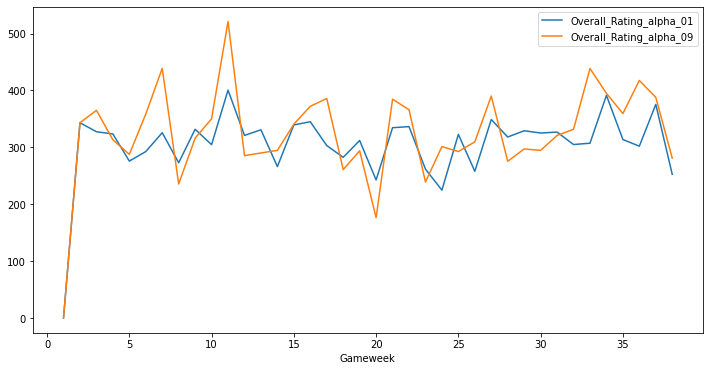

In [20]:
test_plot = player_ratings[['Date_01' , 'HomeTeam_01', 'AwayTeam_01', 'rating_01_h', 'rating_01_a', 'rating_09_h', 'rating_09_a', 'Wk_h', 'Wk_a']]
test_plot_2 = test_plot.drop(test_plot[(test_plot.HomeTeam_01 != 'Fulham') & (test_plot.AwayTeam_01 != 'Fulham')].index)
test_plot_2['rating_01_liv'] = 0
#for row in test_plot_2:
for index, row in test_plot_2.iterrows():
    if row['HomeTeam_01'] == 'Fulham':
        test_plot_2.loc[index, 'Overall_Rating_alpha_01'] = row['rating_01_h']
        test_plot_2.loc[index, 'Overall_Rating_alpha_09'] = row['rating_09_h']
        test_plot_2.loc[index, 'Gameweek'] = row['Wk_h']
    if row['AwayTeam_01'] == 'Fulham':
        test_plot_2.loc[index, 'Overall_Rating_alpha_01'] = row['rating_01_h']
        test_plot_2.loc[index, 'Overall_Rating_alpha_09'] = row['rating_09_h']
        test_plot_2.loc[index, 'Gameweek'] = row['Wk_a']
    #if i['HomeTeam_01'] == 'Liverpool':
     #   test_plot_['rating_01_liv'] = test_plot_2['rating_01_h']
test_plot_3 = test_plot_2[['Gameweek', 'Overall_Rating_alpha_01', 'Overall_Rating_alpha_09']]
test_plot_3.plot(x='Gameweek', y=['Overall_Rating_alpha_01', 'Overall_Rating_alpha_09'])

In [22]:
#prepare Data for ML Algos, including all features from benchmark + rating differences
#add column for H A X
conditions = [
    (player_ratings['FTR_01'] == 'H'),
    (player_ratings['FTR_01'] == 'A'),
    (player_ratings['FTR_01'] == 'D')]
choices = [0, 1, 2]
player_ratings['identifier'] = np.select(conditions, choices)
#PL20_21_features.drop(PL20_21_features[ PL20_21_features.Wk < 6].index, inplace=True)
y = player_ratings['identifier'].to_numpy()
#feature_names = ['rating_h_gk_01', 'rating_a_gk_01', 'rating_h_df_01', 'rating_a_df_01', 'rating_h_mf_01', 'rating_a_mf_01', 'rating_h_att_01','rating_a_att_01', 'rating_h_bench_01', 'rating_a_bench_01', 'rating_h_gk_02', 'rating_a_gk_02', 'rating_h_df_02', 'rating_a_df_02', 'rating_h_mf_02', 'rating_a_mf_02', 'rating_h_att_02','rating_a_att_02', 'rating_h_bench_02', 'rating_a_bench_02', 'rating_h_gk_03', 'rating_a_gk_03', 'rating_h_df_03', 'rating_a_df_03', 'rating_h_mf_03', 'rating_a_mf_03', 'rating_h_att_03','rating_a_att_03', 'rating_h_bench_03', 'rating_a_bench_03', 'rating_h_gk_04', 'rating_a_gk_04', 'rating_h_df_04', 'rating_a_df_04', 'rating_h_mf_04', 'rating_a_mf_04', 'rating_h_att_04','rating_a_att_04', 'rating_h_bench_04', 'rating_a_bench_04', 'rating_h_gk_05', 'rating_a_gk_05', 'rating_h_df_05', 'rating_a_df_05', 'rating_h_mf_05', 'rating_a_mf_05', 'rating_h_att_05','rating_a_att_05', 'rating_h_bench_05', 'rating_a_bench_05', 'rating_h_gk_06', 'rating_a_gk_06', 'rating_h_df_06', 'rating_a_df_06', 'rating_h_mf_06', 'rating_a_mf_06', 'rating_h_att_06','rating_a_att_06', 'rating_h_bench_06', 'rating_a_bench_06', 'rating_h_gk_07', 'rating_a_gk_07', 'rating_h_df_07', 'rating_a_df_07', 'rating_h_mf_07', 'rating_a_mf_07', 'rating_h_att_07','rating_a_att_07', 'rating_h_bench_07', 'rating_a_bench_07', 'rating_h_gk_08', 'rating_a_gk_08', 'rating_h_df_08', 'rating_a_df_08', 'rating_h_mf_08', 'rating_a_mf_08', 'rating_h_att_08','rating_a_att_08', 'rating_h_bench_08', 'rating_a_bench_08', 'rating_h_gk_09', 'rating_a_gk_09', 'rating_h_df_09', 'rating_a_df_09', 'rating_h_mf_09', 'rating_a_mf_09', 'rating_h_att_09','rating_a_att_09', 'rating_h_bench_09', 'rating_a_bench_09']
feature_names = ['Overall_Rating_Alpha_01', 'Overall_Rating_Alpha_02', 'Overall_Rating_Alpha_03', 'Overall_Rating_Alpha_04', 'Overall_Rating_Alpha_05', 'Overall_Rating_Alpha_06', 'Overall_Rating_Alpha_07', 'Overall_Rating_Alpha_08', 'Overall_Rating_Alpha_09', 'FIFA_Rating_Difference', 'FIFA_Rating_H', 'FIFA_Rating_A', 'Points_H', 'Points_A', 'Points_Difference', 'Elo_H', 'Elo_A', 'Elo_Difference', 'Goals_H', 'Goals_A', 'Goals_Difference', 'Shots_H', 'Shots_A', 'Shots_Difference', 'Corners_H', 'Corners_A', 'Corners_Difference', 'Form_H', 'Form_A', 'Form_Difference']
X = player_ratings[feature_names].to_numpy()

In [23]:
#split Data in training and test set and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

0.5342052578894684
FIFA_Rating_Difference     0.049963
Elo_A                      0.041884
Shots_Difference           0.040581
Goals_H                    0.038264
FIFA_Rating_A              0.037863
Elo_Difference             0.035046
Overall_Rating_Alpha_09    0.034897
Points_Difference          0.034733
Goals_Difference           0.034617
Shots_H                    0.034306
Points_A                   0.034221
Overall_Rating_Alpha_01    0.033989
Corners_A                  0.033690
Corners_Difference         0.033645
Corners_H                  0.032417
Elo_H                      0.032061
Form_H                     0.031930
Overall_Rating_Alpha_03    0.031891
Points_H                   0.031771
Form_Difference            0.031660
Overall_Rating_Alpha_08    0.031628
Overall_Rating_Alpha_05    0.030547
Shots_A                    0.030344
Overall_Rating_Alpha_02    0.030341
Overall_Rating_Alpha_04    0.029794
Overall_Rating_Alpha_06    0.028800
Overall_Rating_Alpha_07    0.028727
Goals_A  

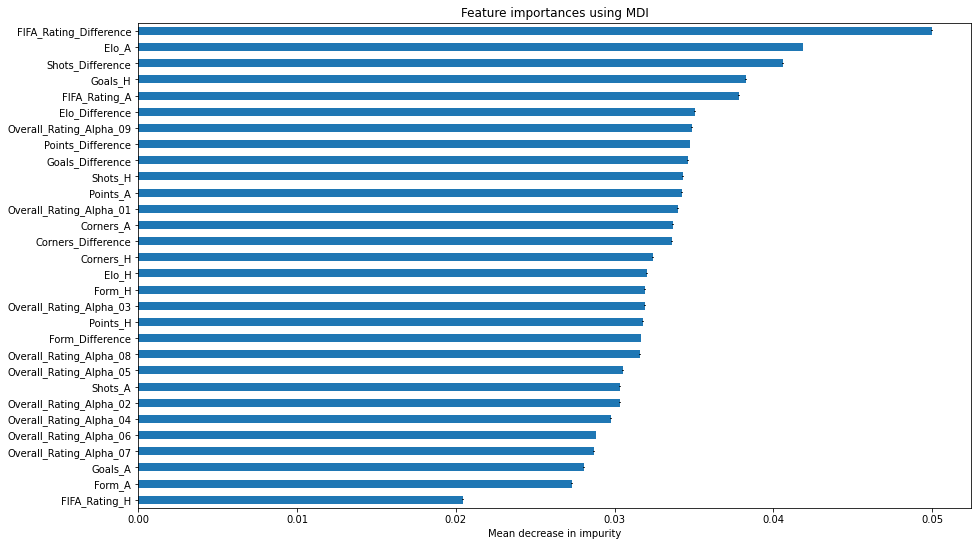

In [24]:
%%time
#split Data in training and test set
d_1 = 0
d_2 = 0
d_3 = 0
d_4 = 0
d_5 = 0
d_6 = 0
d_7 = 0
d_8 = 0
d_9 = 0
rating_dif = 0
rating_h = 0
rating_a = 0
ewm_h = 0
ewm_a = 0
ewm_dif = 0
elo_h = 0
elo_a = 0
elo_dif = 0
goals_h = 0
goals_a = 0
goals_dif = 0
shots_h = 0
shots_a = 0
shots_dif = 0
corners_h = 0
corners_a = 0
corners_dif = 0
form_h = 0
form_a = 0
form_dif = 0


score = []
i = 1000
for i in range(1, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    score.append(rf_model.score(X_test, y_test))
    importances = rf_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    d_1 = d_1 + forest_importances.Overall_Rating_Alpha_01
    d_2 = d_2 + forest_importances.Overall_Rating_Alpha_02
    d_3 = d_3 + forest_importances.Overall_Rating_Alpha_03
    d_4 = d_4 + forest_importances.Overall_Rating_Alpha_04
    d_5 = d_5 + forest_importances.Overall_Rating_Alpha_05
    d_6 = d_6 + forest_importances.Overall_Rating_Alpha_06
    d_7 = d_7 + forest_importances.Overall_Rating_Alpha_07
    d_8 = d_8 + forest_importances.Overall_Rating_Alpha_08
    d_9 = d_9 + forest_importances.Overall_Rating_Alpha_09

    rating_dif = rating_dif + forest_importances['FIFA_Rating_Difference']
    rating_h = rating_h + forest_importances.FIFA_Rating_H
    rating_a = rating_a + forest_importances.FIFA_Rating_A
    ewm_h = ewm_h + forest_importances.Points_H
    ewm_a = ewm_a + forest_importances.Points_A
    ewm_dif = ewm_dif + forest_importances.Points_Difference
    elo_h = elo_h + forest_importances.Elo_H
    elo_a = elo_a + forest_importances.Elo_A
    elo_dif = elo_dif+ forest_importances.Elo_Difference
    goals_h = goals_h+ forest_importances.Goals_H
    goals_a = goals_a+ forest_importances.Goals_A
    goals_dif = goals_dif+ forest_importances.Goals_Difference
    shots_h = shots_h+ forest_importances.Shots_H
    shots_a = shots_a+ forest_importances.Shots_A
    shots_dif = shots_dif+ forest_importances.Shots_Difference
    corners_h = corners_h+ forest_importances.Corners_H
    corners_a = corners_a+ forest_importances.Corners_A
    corners_dif = corners_dif+ forest_importances.Corners_Difference
    form_h = form_h+ forest_importances.Form_H
    form_a = form_a+ forest_importances.Form_A
    form_dif = form_dif+ forest_importances.Form_Difference

fig, ax = plt.subplots()
forest_importances.rating_difference_01 = d_1/i
forest_importances.rating_difference_02 = d_2/i
forest_importances.rating_difference_03 = d_3/i
forest_importances.rating_difference_04 = d_4/i
forest_importances.rating_difference_05 = d_5/i
forest_importances.rating_difference_06 = d_6/i
forest_importances.rating_difference_07 = d_7/i
forest_importances.rating_difference_08 = d_8/i
forest_importances.rating_difference_09 = d_9/i
forest_importances['FIFA_Rating_Difference'] = rating_dif/i
forest_importances.FIFA_Rating_H = rating_h/i
forest_importances.FIFA_Rating_A = rating_a/i
forest_importances.Points_H = ewm_h/i
forest_importances.Points_A = ewm_a/i
forest_importances.Points_Difference = ewm_dif/i
forest_importances.Elo_H = elo_h/i
forest_importances.Elo_A = elo_a/i
forest_importances.Elo_Difference = elo_dif/i
forest_importances.Goals_H = goals_h/i
forest_importances.Goals_A = goals_a/i
forest_importances.Goals_Difference = goals_dif/i
forest_importances.Shots_H = shots_h/i
forest_importances.Shots_A = shots_a/i
forest_importances.Shots_Difference = shots_dif/i
forest_importances.Corners_H = corners_h/i
forest_importances.Corners_A = corners_a/i
forest_importances.Corners_Difference = corners_dif/i
forest_importances.Form_H = form_h/i
forest_importances.Form_A = form_a/i
forest_importances.Form_Difference = form_dif/i




forest_importances = forest_importances.sort_values()
forest_importances.plot.barh(ax=ax, yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout(pad=-5, w_pad=0.5, h_pad=-2)
print(np.mean(score))
print(forest_importances.sort_values(ascending=False))


In [25]:
#use only stats with alpha = 0.9
player_ratings_09 =  pd.merge(player_ratings_a_09, PL20_21_fixtures, on= 'game_home_ID', how='left')
#create differences
player_ratings_09['gk_difference'] = player_ratings_09['rating_h_gk_09'] - player_ratings_09['rating_a_gk_09']
player_ratings_09['df_difference'] = player_ratings_09['rating_h_df_09'] - player_ratings_09['rating_a_df_09']
player_ratings_09['mf_difference'] = player_ratings_09['rating_h_mf_09'] - player_ratings_09['rating_a_mf_09']
player_ratings_09['att_difference'] = player_ratings_09['rating_h_att_09'] - player_ratings_09['rating_a_att_09']
player_ratings_09['bench_difference'] = player_ratings_09['rating_h_bench_09'] - player_ratings_09['rating_a_bench_09']
player_ratings_09['influence_difference'] = player_ratings_09['influence_h_09'] - player_ratings_09['influence_a_09']
player_ratings_09['creativity_difference'] = player_ratings_09['creativity_h_09'] - player_ratings_09['creativity_a_09']
player_ratings_09['threat_difference'] = player_ratings_09['threat_h_09'] - player_ratings_09['threat_a_09']
player_ratings_09['bps_difference'] = player_ratings_09['bps_h_09'] - player_ratings_09['bps_a_09']
player_ratings_09['selected_difference'] = player_ratings_09['selected_h_09'] - player_ratings_09['selected_a_09']
player_ratings_09['overall_h'] = player_ratings_09['rating_h_gk_09'] + player_ratings_09['rating_h_df_09'] + player_ratings_09['rating_h_mf_09'] + player_ratings_09['rating_h_att_09'] + player_ratings_09['rating_h_bench_09']
player_ratings_09['overall_a'] = player_ratings_09['rating_a_gk_09'] + player_ratings_09['rating_a_df_09'] + player_ratings_09['rating_a_mf_09'] + player_ratings_09['rating_a_att_09'] + player_ratings_09['rating_a_bench_09']
player_ratings_09['overall_difference'] = player_ratings_09['overall_h'] - player_ratings_09['overall_a']
player_ratings_09

,Unnamed: 0_09,Date_09,Time_09,HomeTeam_09,AwayTeam_09,FTHG_09,FTAG_09,FTR_09,game_home_ID,game_away_ID_09,...,att_difference,bench_difference,influence_difference,creativity_difference,threat_difference,bps_difference,selected_difference,overall_h,overall_a,overall_difference
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,14.278922,25.279522,158.174214,98.310169,95.265832,156.049672,5.900544e+06,451.836114,267.630667,184.205447
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,-41.715032,70.551168,-57.490544,-115.984351,-44.672924,-102.847780,6.376243e+05,276.980872,355.553716,-78.572844
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,27.336143,22.933582,27.687544,32.584193,-68.221724,33.241672,-6.920692e+05,349.741751,223.019166,126.722585
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,83.344220,-15.656909,145.588167,70.495742,175.666343,79.939011,3.410067e+06,388.783331,378.471357,10.311974
